In this lab we will review some basics of pytorch. Save your answers for this lab as they will be used for part of Lab 2. 



(1) Create a dataloader for the MNIST training data using torchvision package. Have your dataloader iterate over the training set outputing mini-batches of size 256 image samples. Note you do not need to use the image labels in this lab. You may follow the example in the official pytorch examples: 

https://github.com/pytorch/examples/blob/master/mnist/main.py#L112-L120


In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

In [3]:
n_epochs = 3
batch_size_train = 256
batch_size_test = 256
learning_rate = 0.01
momentum = 0.5
log_interval = 10
random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

In [4]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])


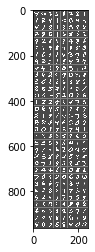

In [5]:
dataiter = iter(test_loader)
images, labels =dataiter.next()
print(images.shape)
imshow(torchvision.utils.make_grid(images))

examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)
print(example_data.shape)

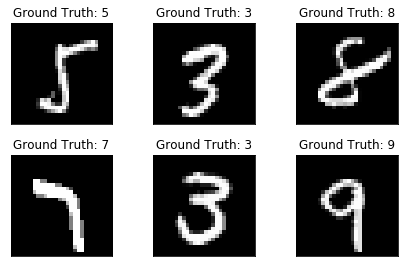

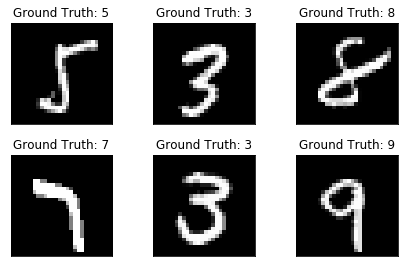

In [6]:
import matplotlib.pyplot as plt
fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
#   print(len(torch.flatten(example_data[i+10][0])))
  plt.imshow(example_data[i+10][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i+10]))
  plt.xticks([])
  plt.yticks([])
fig
    

(2) Using only torch primitives (e.g. torch.matmul, torch._relu, etc) implement a simple feedforward neural network with 2 hidden layers that takes as input MNIST digits and outputs a single scalar value. You may select the hidden layer width (greater than 20) and activations (tanh, relu, sigmoid, others) as desired.  Initialize the weights and biases with uniform random values in the range -1 to 1. Avoid using any functions from torch.nn class. Using the loop from (1) Forward pass through the dataset in mini-batches of 256 and record the time this takes. 

In [7]:
# generating some random features
#     print(features)
#     print(features.shape)
# define the weights
# W1 = torch.randn((784, 12), requires_grad=True)
import timeit
params={"W1":torch.FloatTensor(784, 12).uniform_(-1, 1),
    # print(W1)
    "W2": torch.FloatTensor(12, 10).uniform_(-1, 1), #torch.randn((12, 10), requires_grad=True)
    "W3": torch.FloatTensor(10, 1).uniform_(-1, 1), #torch.randn((10, 1), requires_grad=True)
    # define the bias terms
    "B1": torch.FloatTensor(12).uniform_(-1, 1), #torch.randn((12), requires_grad=True)
    "B2": torch.FloatTensor(10).uniform_(-1, 1), #torch.randn((10), requires_grad=True)
    "B3": torch.FloatTensor(1).uniform_(-1, 1), #torch.randn((1), requires_grad=True)]
       }
def my_simple_ff_nn(img,nn_params):      
    W1=nn_params["W1"]
    W2=nn_params["W2"]
    W3=nn_params["W3"]
    B1=nn_params["B1"]
    B2=nn_params["B2"]
    B3=nn_params["B3"]
    features = torch.flatten(img).reshape(-1)
        # calculate hidden and output layers
    h1 = F.relu((features @ W1) + B1)
    h2 = F.relu((h1 @ W2) + B2)
    output = torch.sigmoid((h2 @ W3) + B3)
    print(output)

start = timeit.default_timer()   
for idx in range(len(example_data)):
     my_simple_ff_nn(example_data[idx][0],params)
stop = timeit.default_timer()
print('FF 256 images Time= :',stop - start) 

tensor([1.9250e-07])
tensor([6.5842e-09])
tensor([0.0002])
tensor([8.8074e-13])
tensor([1.6191e-08])
tensor([6.9406e-13])
tensor([2.5992e-11])
tensor([2.3353e-11])
tensor([7.8137e-11])
tensor([1.1934e-15])
tensor([8.9004e-14])
tensor([2.2219e-09])
tensor([2.2988e-08])
tensor([1.1119e-17])
tensor([1.])
tensor([0.9875])
tensor([3.4141e-15])
tensor([7.8295e-15])
tensor([2.9420e-07])
tensor([0.8383])
tensor([0.4904])
tensor([8.2852e-12])
tensor([0.0007])
tensor([5.7557e-07])
tensor([0.1838])
tensor([2.9703e-18])
tensor([2.7820e-13])
tensor([1.3344e-19])
tensor([2.3103e-11])
tensor([1.7211e-06])
tensor([2.2085e-12])
tensor([5.9497e-18])
tensor([1.5195e-08])
tensor([1.9690e-24])
tensor([2.9478e-21])
tensor([9.1001e-23])
tensor([0.0407])
tensor([2.9788e-06])
tensor([5.6683e-10])
tensor([0.0365])
tensor([1.4901e-16])
tensor([1.9873e-12])
tensor([1.4318e-22])
tensor([2.8170e-08])
tensor([1.5672e-10])
tensor([6.6215e-09])
tensor([0.7757])
tensor([0.9368])
tensor([2.0810e-15])
tensor([1.6246e-12]

(3) Implement a new torch.nn.module that performs the equivalent of the network in (2). Initialize it with the same weights and validate the outputs of this network is the same as the one in (2) on MNIST training set.

In [13]:
def weights_init_uniform(m):
        classname = m.__class__.__name__
        # for every Linear layer in a model..
        if classname.find('Linear') != -1:
            # apply a uniform distribution to the weights and a bias=0
            m.weight.data.uniform_(-1, 1.0)
            m.bias.data.fill_(0)

In [14]:
class my_torch_nn(nn.Module):
    def __init__(self):
        super(my_torch_nn, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)
    
    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

In [15]:
network = my_torch_nn()
network.apply(weights_init_uniform)
optimizer = optim.SGD(network.parameters(), lr=learning_rate,momentum=momentum)

In [16]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

def train(epoch):
  network.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = network(data)
    print('output=',output)
    print('target=',target)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % log_interval == 0:
        print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
        
        train_losses.append(loss.item())
        train_counter.append((batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
        torch.save(network.state_dict(), 'model.pth')
        torch.save(optimizer.state_dict(), 'optimizer.pth')

def test():
  network.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = network(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [17]:
test()
for epoch in range(1, n_epochs + 1):
  train(epoch)
  test()

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
c:\program files\python37\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 18.9188, Accuracy: 1021/10000 (10%)

output= tensor([[-2.6852e+01, -5.6851e+00, -4.7861e+01,  ..., -3.4020e-03,
         -3.4253e+01, -2.8846e+01],
        [-7.9550e+01, -5.0365e+01, -7.1319e+01,  ..., -4.8861e+01,
         -4.2195e+01,  0.0000e+00],
        [-3.1429e+01, -3.7946e+01, -3.8392e+01,  ..., -4.0257e+01,
         -5.2649e+01, -3.7183e+01],
        ...,
        [-1.0389e+02, -4.3325e+01, -4.4091e+01,  ..., -3.3553e+01,
         -5.2609e+01,  0.0000e+00],
        [-4.2844e+01, -3.6682e+01, -2.3120e+01,  ..., -1.8671e+01,
         -1.9739e+01, -2.2014e+01],
        [-2.9988e+01, -1.2900e+01, -3.5721e+01,  ..., -1.1131e+01,
         -7.5267e+00, -6.1919e-02]], grad_fn=<LogSoftmaxBackward>)
target= tensor([6, 1, 1, 0, 7, 5, 7, 5, 2, 1, 3, 7, 1, 7, 6, 0, 5, 8, 4, 4, 9, 5, 3, 0,
        6, 7, 0, 9, 4, 3, 1, 3, 4, 7, 2, 4, 8, 5, 8, 5, 4, 2, 8, 4, 8, 8, 3, 9,
        1, 4, 6, 9, 5, 2, 6, 9, 4, 5, 4, 2, 2, 7, 0, 7, 2, 9, 1, 3, 0, 9, 8, 6,
        4, 8, 8, 0, 1, 

output= tensor([[-2.7230, -1.7543, -2.0314,  ..., -1.8687, -1.9660, -2.5725],
        [-2.2970, -2.3151, -2.2987,  ..., -2.3025, -2.2990, -2.3117],
        [-2.2956, -2.3133, -2.2999,  ..., -2.3042, -2.2976, -2.3122],
        ...,
        [-2.2933, -2.3139, -2.2994,  ..., -2.3021, -2.3013, -2.3141],
        [-2.2980, -2.3129, -2.2983,  ..., -2.3011, -2.2994, -2.3111],
        [-2.2979, -2.3139, -2.2996,  ..., -2.3029, -2.3025, -2.3088]],
       grad_fn=<LogSoftmaxBackward>)
target= tensor([5, 1, 3, 5, 1, 2, 0, 7, 0, 5, 5, 3, 3, 2, 5, 1, 0, 8, 6, 4, 3, 5, 7, 3,
        3, 6, 4, 3, 4, 3, 6, 4, 2, 9, 3, 0, 7, 6, 7, 7, 9, 2, 6, 7, 6, 8, 5, 3,
        1, 6, 0, 1, 6, 0, 0, 1, 9, 8, 8, 3, 6, 6, 3, 3, 1, 7, 8, 2, 8, 0, 8, 4,
        9, 3, 9, 9, 3, 1, 4, 9, 4, 3, 8, 2, 8, 3, 3, 1, 3, 5, 2, 2, 7, 8, 6, 0,
        1, 8, 6, 7, 1, 3, 9, 8, 6, 2, 7, 9, 4, 5, 3, 9, 4, 0, 3, 2, 6, 8, 9, 2,
        8, 5, 3, 5, 4, 6, 8, 4, 7, 9, 0, 8, 1, 8, 2, 0, 5, 7, 0, 0, 9, 2, 8, 1,
        7, 6, 9, 9, 7, 3, 6, 4, 7

output= tensor([[-2.3024, -2.3150, -2.2963,  ..., -2.2957, -2.3075, -2.3075],
        [-2.2929, -2.3186, -2.2931,  ..., -2.2879, -2.3158, -2.3180],
        [-2.3072, -2.3344, -2.2958,  ..., -2.2810, -2.3212, -2.2896],
        ...,
        [-2.3024, -2.3150, -2.2963,  ..., -2.2957, -2.3075, -2.3074],
        [-2.2929, -2.3186, -2.2931,  ..., -2.2879, -2.3158, -2.3180],
        [-2.2891, -2.3109, -2.2988,  ..., -2.2942, -2.3160, -2.3160]],
       grad_fn=<LogSoftmaxBackward>)
target= tensor([5, 6, 4, 6, 3, 3, 6, 5, 3, 8, 1, 2, 7, 5, 2, 2, 9, 0, 0, 0, 1, 9, 1, 7,
        0, 8, 7, 2, 1, 5, 8, 6, 4, 9, 4, 9, 5, 4, 1, 4, 8, 3, 3, 9, 9, 1, 7, 3,
        8, 3, 6, 3, 3, 4, 7, 4, 1, 7, 6, 8, 2, 8, 9, 1, 4, 2, 5, 3, 8, 5, 8, 2,
        8, 5, 0, 8, 0, 4, 0, 2, 0, 5, 6, 5, 3, 1, 1, 4, 1, 2, 8, 9, 1, 8, 5, 8,
        6, 0, 9, 3, 6, 2, 5, 1, 5, 8, 6, 8, 2, 9, 7, 2, 3, 0, 2, 0, 3, 8, 3, 2,
        8, 0, 7, 9, 2, 8, 5, 5, 3, 3, 9, 0, 6, 1, 6, 0, 2, 7, 3, 4, 3, 0, 0, 3,
        4, 3, 7, 4, 8, 1, 3, 0, 0

output= tensor([[-2.3002, -2.3150, -2.2961,  ..., -2.2948, -2.3020, -2.3130],
        [-2.2852, -2.3185, -2.2927,  ..., -2.2819, -2.3257, -2.3251],
        [-2.2820, -2.3111, -2.2983,  ..., -2.2878, -2.3269, -2.3223],
        ...,
        [-2.3065, -2.2741, -2.2853,  ..., -2.3230, -2.3433, -2.3414],
        [-2.2953, -2.3099, -2.3002,  ..., -2.3005, -2.2975, -2.3149],
        [-2.2852, -2.3185, -2.2927,  ..., -2.2819, -2.3257, -2.3251]],
       grad_fn=<LogSoftmaxBackward>)
target= tensor([6, 3, 9, 5, 3, 5, 2, 9, 2, 0, 1, 4, 2, 9, 1, 6, 1, 2, 6, 8, 1, 8, 0, 7,
        6, 4, 5, 2, 0, 2, 4, 7, 8, 2, 0, 6, 9, 0, 1, 9, 6, 9, 1, 1, 1, 9, 6, 3,
        2, 5, 3, 9, 9, 2, 5, 6, 7, 4, 2, 5, 0, 9, 3, 4, 2, 2, 4, 0, 1, 9, 0, 3,
        3, 1, 4, 5, 7, 1, 8, 8, 9, 8, 8, 3, 5, 0, 8, 8, 6, 4, 1, 8, 1, 0, 2, 2,
        3, 5, 8, 4, 4, 8, 1, 8, 0, 4, 2, 8, 2, 6, 3, 5, 5, 0, 1, 3, 7, 6, 3, 0,
        4, 7, 0, 9, 2, 2, 9, 1, 7, 1, 6, 9, 1, 1, 7, 7, 7, 0, 2, 1, 0, 3, 3, 3,
        2, 0, 3, 8, 2, 9, 2, 4, 3

output= tensor([[-2.2817, -2.3096, -2.2982,  ..., -2.2883, -2.3231, -2.3231],
        [-2.3005, -2.3119, -2.2960,  ..., -2.2949, -2.3055, -2.3117],
        [-2.2956, -2.3066, -2.3016,  ..., -2.3012, -2.3003, -2.3124],
        ...,
        [-2.2864, -2.3156, -2.2932,  ..., -2.2829, -2.3289, -2.3216],
        [-2.2951, -2.3056, -2.3008,  ..., -2.3009, -2.3002, -2.3133],
        [-2.2812, -2.3096, -2.2980,  ..., -2.2886, -2.3218, -2.3255]],
       grad_fn=<LogSoftmaxBackward>)
target= tensor([4, 0, 1, 1, 3, 2, 6, 2, 9, 5, 4, 8, 4, 1, 3, 1, 2, 6, 2, 3, 8, 8, 5, 3,
        3, 9, 4, 0, 7, 9, 8, 8, 0, 0, 6, 7, 6, 9, 4, 1, 4, 8, 5, 9, 5, 8, 0, 9,
        9, 6, 8, 9, 4, 4, 0, 8, 5, 5, 0, 1, 9, 7, 3, 2, 6, 8, 0, 2, 1, 2, 6, 8,
        9, 4, 1, 6, 1, 1, 5, 2, 8, 4, 9, 0, 7, 6, 5, 5, 2, 1, 5, 5, 1, 5, 0, 0,
        7, 9, 2, 2, 0, 8, 2, 6, 4, 3, 2, 9, 5, 6, 7, 5, 4, 1, 1, 3, 6, 2, 9, 2,
        8, 3, 5, 9, 2, 1, 3, 7, 6, 6, 5, 7, 3, 6, 0, 1, 6, 6, 6, 5, 5, 0, 0, 5,
        9, 8, 9, 0, 2, 1, 0, 9, 2

output= tensor([[-2.2816, -2.3145, -2.2905,  ..., -2.2788, -2.3311, -2.3286],
        [-2.2721, -2.3143, -2.2991,  ..., -2.2873, -2.3198, -2.3292],
        [-2.2816, -2.3164, -2.2933,  ..., -2.2781, -2.3328, -2.3209],
        ...,
        [-2.2750, -2.3113, -2.2967,  ..., -2.2838, -2.3224, -2.3270],
        [-2.3256, -2.3422, -2.2685,  ..., -2.2712, -2.2677, -2.3269],
        [-2.2759, -2.3078, -2.2952,  ..., -2.2854, -2.3260, -2.3307]],
       grad_fn=<LogSoftmaxBackward>)
target= tensor([8, 7, 7, 6, 1, 4, 0, 4, 9, 1, 3, 2, 1, 0, 2, 1, 0, 8, 0, 4, 2, 3, 2, 1,
        7, 9, 0, 3, 4, 2, 6, 9, 2, 4, 4, 0, 2, 2, 8, 3, 9, 5, 8, 2, 4, 1, 5, 6,
        0, 6, 4, 4, 7, 4, 1, 0, 8, 5, 9, 8, 7, 2, 4, 9, 7, 9, 4, 6, 7, 0, 8, 1,
        3, 4, 8, 7, 1, 2, 6, 7, 2, 6, 1, 1, 7, 0, 3, 8, 8, 3, 3, 6, 3, 9, 4, 9,
        5, 5, 8, 3, 8, 2, 4, 7, 3, 4, 5, 6, 1, 9, 8, 3, 1, 3, 6, 9, 6, 1, 3, 8,
        0, 3, 8, 0, 3, 6, 3, 5, 1, 8, 5, 7, 8, 3, 1, 7, 1, 7, 0, 1, 7, 1, 2, 6,
        7, 0, 0, 4, 3, 5, 0, 8, 2

output= tensor([[-2.2894, -2.3172, -2.2971,  ..., -2.2900, -2.2945, -2.3066],
        [-3.0847, -2.2045, -1.7647,  ..., -2.4108, -2.4527, -2.6415],
        [-2.2693, -2.3101, -2.2959,  ..., -2.2823, -2.3289, -2.3304],
        ...,
        [-2.5634, -2.2509, -2.1890,  ..., -2.0482, -2.4229, -2.0048],
        [-2.3145, -2.3805, -2.3577,  ..., -2.4658, -2.4569, -2.0498],
        [-2.2619, -2.3252, -2.2989,  ..., -2.2880, -2.3138, -2.3376]],
       grad_fn=<LogSoftmaxBackward>)
target= tensor([4, 3, 3, 4, 1, 0, 8, 2, 8, 8, 4, 6, 8, 9, 3, 0, 4, 7, 7, 5, 9, 9, 6, 6,
        3, 1, 2, 3, 1, 6, 7, 3, 7, 6, 3, 8, 1, 0, 0, 2, 7, 8, 4, 6, 7, 6, 7, 9,
        0, 8, 1, 1, 4, 8, 2, 3, 0, 7, 9, 1, 9, 0, 7, 6, 0, 6, 9, 0, 3, 1, 3, 8,
        4, 0, 0, 4, 7, 1, 6, 6, 6, 0, 8, 6, 1, 6, 7, 1, 4, 4, 1, 0, 9, 3, 3, 5,
        2, 7, 6, 7, 0, 4, 6, 3, 4, 5, 3, 9, 1, 1, 0, 3, 0, 1, 4, 5, 1, 2, 7, 3,
        5, 9, 0, 1, 1, 4, 0, 9, 0, 5, 6, 6, 9, 4, 1, 7, 9, 3, 2, 6, 6, 1, 8, 9,
        6, 4, 0, 9, 7, 2, 0, 9, 6

output= tensor([[-3.1781, -2.6561, -2.2579,  ..., -2.2419, -1.6003, -1.7121],
        [-2.2579, -2.3146, -2.2982,  ..., -2.2675, -2.3328, -2.3286],
        [-2.2624, -2.3110, -2.3016,  ..., -2.2838, -2.3351, -2.3347],
        ...,
        [-2.2846, -2.3060, -2.3041,  ..., -2.3044, -2.2834, -2.3249],
        [-2.2571, -2.3232, -2.2928,  ..., -2.2632, -2.3225, -2.3389],
        [-2.2308, -2.4160, -2.4695,  ..., -2.2912, -2.3039, -2.2308]],
       grad_fn=<LogSoftmaxBackward>)
target= tensor([8, 5, 3, 9, 7, 7, 1, 9, 9, 3, 6, 1, 1, 3, 3, 1, 1, 6, 1, 2, 8, 6, 6, 4,
        5, 8, 5, 3, 5, 0, 6, 0, 6, 0, 3, 3, 2, 9, 9, 7, 5, 8, 2, 3, 1, 7, 1, 2,
        5, 9, 6, 5, 9, 9, 7, 3, 8, 5, 8, 6, 8, 0, 9, 2, 0, 0, 5, 0, 1, 6, 7, 8,
        2, 6, 8, 7, 9, 5, 0, 9, 5, 2, 0, 9, 0, 5, 3, 3, 1, 5, 9, 5, 9, 4, 2, 2,
        2, 5, 0, 4, 2, 9, 3, 0, 9, 5, 6, 6, 9, 2, 7, 6, 1, 0, 3, 6, 2, 7, 1, 0,
        2, 7, 4, 8, 3, 2, 3, 0, 6, 2, 0, 3, 2, 9, 6, 4, 8, 5, 4, 9, 3, 9, 1, 4,
        9, 6, 3, 1, 9, 8, 8, 4, 5

output= tensor([[-2.5539, -2.2188, -2.1757,  ..., -2.1950, -2.3577, -2.2584],
        [-2.2619, -2.3075, -2.3003,  ..., -2.2679, -2.3495, -2.3423],
        [-2.2547, -2.3047, -2.2983,  ..., -2.2746, -2.3468, -2.3422],
        ...,
        [-2.2831, -2.3231, -2.2969,  ..., -2.2712, -2.3482, -2.3150],
        [-2.6388, -2.3624, -2.2846,  ..., -2.2004, -2.1100, -2.1406],
        [-2.2915, -2.2935, -2.3082,  ..., -2.3041, -2.3023, -2.3109]],
       grad_fn=<LogSoftmaxBackward>)
target= tensor([2, 7, 9, 0, 1, 8, 9, 0, 9, 8, 1, 3, 1, 4, 3, 5, 8, 8, 3, 7, 8, 1, 3, 2,
        0, 1, 5, 9, 1, 1, 6, 0, 8, 7, 8, 7, 4, 4, 4, 9, 1, 7, 6, 8, 9, 3, 4, 2,
        2, 2, 8, 0, 4, 1, 4, 9, 1, 6, 6, 1, 7, 7, 9, 7, 0, 2, 7, 4, 3, 7, 1, 5,
        8, 1, 5, 2, 1, 5, 8, 5, 9, 1, 6, 4, 8, 4, 5, 0, 2, 6, 3, 1, 7, 1, 5, 4,
        3, 5, 0, 8, 5, 8, 3, 5, 0, 4, 7, 1, 5, 7, 0, 0, 1, 9, 2, 6, 2, 6, 5, 0,
        4, 2, 1, 6, 1, 3, 0, 6, 7, 5, 4, 6, 7, 2, 0, 5, 7, 2, 0, 1, 0, 7, 8, 1,
        7, 8, 3, 2, 3, 4, 0, 3, 3

output= tensor([[-2.2631, -2.7613, -2.7481,  ..., -2.4480, -2.2830, -2.2666],
        [-3.0259, -1.8449, -2.2313,  ..., -1.9385, -2.4652, -2.2687],
        [-2.2883, -2.3051, -2.3062,  ..., -2.2838, -2.2873, -2.3103],
        ...,
        [-2.2966, -2.2980, -2.3044,  ..., -2.2916, -2.2950, -2.3149],
        [-2.9705, -2.1507, -2.3557,  ..., -2.0502, -2.2214, -2.0655],
        [-2.2959, -2.2978, -2.3088,  ..., -2.2949, -2.3046, -2.3096]],
       grad_fn=<LogSoftmaxBackward>)
target= tensor([4, 5, 1, 8, 0, 6, 2, 4, 1, 2, 8, 4, 3, 0, 6, 2, 6, 1, 9, 7, 6, 8, 5, 9,
        9, 8, 0, 9, 2, 9, 1, 6, 6, 3, 3, 7, 2, 8, 6, 9, 3, 0, 5, 6, 0, 4, 4, 2,
        2, 4, 6, 5, 4, 5, 5, 2, 7, 7, 9, 3, 5, 9, 6, 0, 5, 6, 8, 1, 6, 7, 2, 0,
        2, 6, 2, 7, 4, 4, 0, 0, 5, 3, 0, 6, 8, 8, 4, 9, 8, 5, 6, 0, 0, 3, 8, 3,
        5, 1, 9, 2, 0, 3, 5, 5, 3, 7, 9, 0, 6, 3, 9, 1, 9, 2, 5, 2, 2, 4, 5, 1,
        0, 4, 4, 5, 5, 4, 3, 1, 3, 1, 3, 1, 5, 9, 8, 9, 8, 7, 0, 2, 8, 1, 5, 0,
        1, 2, 0, 5, 4, 5, 1, 6, 4

KeyboardInterrupt: 

Text(0, 0.5, 'negative log likelihood loss')

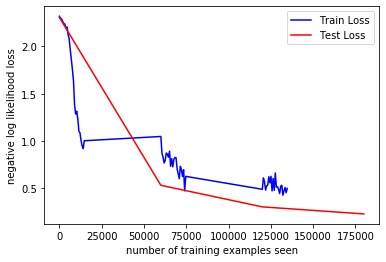

In [68]:
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.plot(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


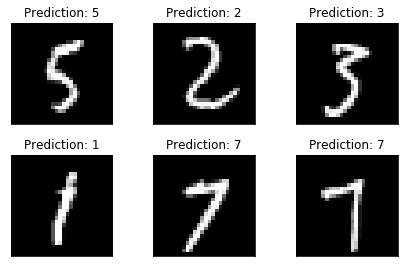

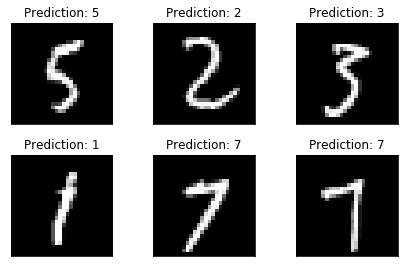

In [70]:
with torch.no_grad():
  output = network(example_data)
# compare the model's output.
fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Prediction: {}".format(
    output.data.max(1, keepdim=True)[1][i].item()))
  plt.xticks([])
  plt.yticks([])
fig

(4) For a batch of 256 random samples, compute the gradient of the average of the neural network outputs (over the batch) w.r.t to the weights using torch autograd. Compute the gradients for the torch.nn based model in (3) and validate the gradients match those from those computed with (2). 

**Note**: The network here is $f: \mathcal{R}^{HW}\rightarrow\mathcal{R}$, with $256$ samples you should obtain $o=\frac{1}{256}\sum_{i=0}^{255}f(x_i)$. You are asked to find $\nabla_w o$ for all the parameters $w$.

In [104]:
print('CONV1 avg grad=\n',sum(network.conv1.weight.grad)/len(network.conv1.weight.grad)) 
print('CONV1 bais=',network.conv1.bias.grad)
print('CONV2 avg grad=\n',sum(network.conv2.weight.grad)/len(network.conv2.weight.grad)) 
print('CONV2 bais=',network.conv2.bias.grad)

CONV1 avg grad=
 tensor([[[-0.0115, -0.0148,  0.0041,  0.0047, -0.0047],
         [-0.0101,  0.0090,  0.0160,  0.0061, -0.0109],
         [ 0.0149,  0.0364,  0.0252,  0.0043, -0.0108],
         [ 0.0229,  0.0234,  0.0192,  0.0084, -0.0163],
         [ 0.0127,  0.0159,  0.0247,  0.0119, -0.0239]]])
CONV1 bais= tensor([ 0.0719,  0.0204,  0.0418, -0.0840, -0.0738,  0.0930, -0.0252, -0.0163,
         0.0376, -0.0187])
CONV2 avg grad=
 tensor([[[ 8.1622e-03,  1.1241e-03, -1.1303e-03, -3.4079e-03, -3.8529e-03],
         [ 7.4713e-03,  2.0216e-03, -1.0730e-03, -2.3892e-03, -4.3317e-03],
         [ 8.1102e-03,  3.1657e-03,  1.0417e-03, -3.0093e-03, -4.9821e-03],
         [ 6.2450e-03,  8.6071e-03,  3.9458e-03,  2.6482e-03, -4.0992e-03],
         [ 7.9142e-03,  9.0671e-03,  7.3794e-03,  4.4229e-03,  1.3005e-03]],

        [[-6.3245e-03,  1.1890e-02,  1.0024e-02, -3.3405e-03,  1.4274e-02],
         [-3.8762e-03,  1.3886e-02,  1.4757e-03,  7.3571e-03,  8.5690e-03],
         [ 1.7839e-03,  3.2817e

(5) Perform  the forward and backward passes from (3), 10 times on cpu and 10 times on gpu, report the average time for both. Repeat this for just the forward pass. In the end you should obtain 4 average run times (forward and backward, forward only) x (cpu, gpu) 

In [103]:
import timeit
total_t=0
for iter in range(10):
    start = timeit.default_timer()
    for epoch in range(1):        
        train(epoch)    
    stop = timeit.default_timer()
    print('Train Time for epoch: ',epoch,'=', stop - start) 
    total_t=total_t+(stop - start)
print('avg_time=',total_t/10)

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Train Epoch: 0 [0/60000 (0%)]	Loss: 2.034178
Train Epoch: 0 [2560/60000 (4%)]	Loss: 1.803627
Train Epoch: 0 [5120/60000 (9%)]	Loss: 1.873235
Train Epoch: 0 [7680/60000 (13%)]	Loss: 1.976927
Train Epoch: 0 [10240/60000 (17%)]	Loss: 1.889993
Train Epoch: 0 [12800/60000 (21%)]	Loss: 1.906535
Train Epoch: 0 [15360/60000 (26%)]	Loss: 1.946473
Train Epoch: 0 [17920/60000 (30%)]	Loss: 1.864058
Train Epoch: 0 [20480/60000 (34%)]	Loss: 1.912492
Train Epoch: 0 [23040/60000 (38%)]	Loss: 1.888984
Train Epoch: 0 [25600/60000 (43%)]	Loss: 1.817260
Train Epoch: 0 [28160/60000 (47%)]	Loss: 1.765820
Train Epoch: 0 [30720/60000 (51%)]	Loss: 1.912878
Train Epoch: 0 [33280/60000 (55%)]	Loss: 1.782560
Train Epoch: 0 [35840/60000 (60%)]	Loss: 1.866216
Train Epoch: 0 [38400/60000 (64%)]	Loss: 1.854770
Train Epoch: 0 [40960/60000 (68%)]	Loss: 1.779593
Train Epoch: 0 [43520/60000 (72%)]	Loss: 1.828561
Train Epoch: 0 [46080/60000 (77%)]	Loss: 1.946491
Train Epoch: 0 [48640/60000 (81%)]	Loss: 1.843549
Train Epoc

KeyboardInterrupt: 